# Обучаем первые классификаторы в sklearn

### Данные

Задача на kaggle: https://www.kaggle.com/c/bioresponse

Данные: https://www.kaggle.com/c/bioresponse/data

По данным характеристикам молекулы требуется определить, будет ли дан биологический ответ (biological response).

Признаки нормализованы.

Для демонстрации используется обучающая выборка из исходных данных train.csv, файл с данными прилагается.

### Готовим обучающую и тестовую выборки

In [4]:
import pandas as pd
bioresponce = pd.read_csv('bioresponse.csv', sep=',')

In [5]:
bioresponce.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y = bioresponce['Activity'].values

In [7]:
y

array([1, 1, 1, ..., 0, 1, 0])

In [8]:
bioresponce.iloc[:2, :5]

,Activity,D1,D2,D3,D4
0,1,0.000000,0.497009,0.10,0.0
1,1,0.366667,0.606291,0.05,0.0


In [9]:
X = bioresponce.iloc[:, 1:]

In [10]:
X

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,...,0,0,0,0,0,0,0,0,0,0
3747,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,...,0,0,1,0,1,0,1,0,0,0
3748,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,...,0,0,0,0,0,0,0,0,0,0
3749,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.372936,...,0,0,0,0,0,0,0,0,0,0


In [16]:
import numpy as np
import sklearn

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### Строим модель и оцениваем качество

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

In [22]:
print (sum(preds == y_test) / len(preds))

0.6978998384491115


In [27]:
from sklearn.metrics import f1_score

print (f1_score(preds, y_test))

0.7217261904761905


### Пробуем другие классификаторы

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100), 
    GradientBoostingClassifier(n_estimators=200, max_depth=5)
]

for model in models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print (f1_score(preds, y_test), model)

0.7514285714285716 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
0.7252419955323902 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.8029197080291971 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_

## Задание на 10 минут:

1. Откройте этот блокнот у себя на компьютере, если у вас есть Python, pandas и sklearn, либо воспользуйтесь помощью соседа (если у него все установлено)
1. Попробуйте разные классификаторы с разными параметрами и постарайтесь добиться максимального качества на тестовой выборке

Над этим заданием можно работать в группах. Если у вас нет возможности выполнить его на занятии - попробуйте, когда окажетесь дома.

In [40]:
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt

In [56]:
    def plot_func(n_estimators_,f1_train,f1_test,classif,x_label):
        plt.figure('f1')
        plt.title(classif)
        plt.grid(True)
        plt.plot(n_estimators_, f1_train, label = 'train')
        plt.plot(n_estimators_, f1_test, label = 'test')
        plt.legend(loc='best')
        plt.ylim(0.5, 1.05)
        plt.ylabel('f1 score')
        plt.xlabel(x_label)
        plt.show()

In [61]:
f1_train_kn = []
f1_test_kn = []

n_neighbors_=np.arange(1, 16, 1)

for i in tqdm(n_neighbors_):

    KN = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    KN.fit(X_train, y_train)
    preds_train = KN.predict(X_train)
    preds_test = KN.predict(X_test)
    f1_train_kn.append(f1_score(preds_train, y_train))
    f1_test_kn.append(f1_score(preds_test, y_test))

100%|██████████| 15/15 [01:18<00:00,  5.25s/it]


In [54]:
f1_train_dt = []
f1_test_dt = []

depth= np.arange(3, 103, 1)

for i in tqdm(depth):
    
    DT = DecisionTreeClassifier(max_depth=i)
    DT.fit(X_train,y_train)
    preds_train = DT.predict(X_train)
    preds_test = DT.predict(X_test)
    f1_train_dt.append(f1_score(preds_train, y_train))
    f1_test_dt.append(f1_score(preds_test, y_test))

100%|██████████| 100/100 [00:59<00:00,  1.67it/s]


In [51]:
f1_train_rf = []
f1_test_rf = []

n_estimators_ = np.arange(1, 501, 10)

for i in tqdm(n_estimators_):

    RF = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=1, n_jobs=-1)
    RF.fit(X_train, y_train)
    preds_train = RF.predict(X_train)
    preds_test = RF.predict(X_test)
    f1_train_rf.append(f1_score(preds_train, y_train))
    f1_test_rf.append(f1_score(preds_test, y_test))

100%|██████████| 50/50 [00:47<00:00,  1.06it/s]


In [59]:
f1_train_gb = []
f1_test_gb = []

n = np.arange(1, 6, 1)

for i in tqdm(n):

    GB = GradientBoostingClassifier(max_depth=i)
    GB.fit(X_train, y_train)
    preds_train = RF.predict(X_train)
    preds_test = RF.predict(X_test)
    f1_train_gb.append(f1_score(preds_train, y_train))
    f1_test_gb.append(f1_score(preds_test, y_test))

100%|██████████| 5/5 [00:47<00:00,  9.56s/it]


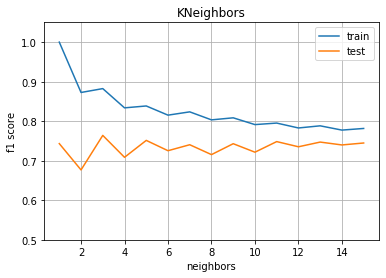

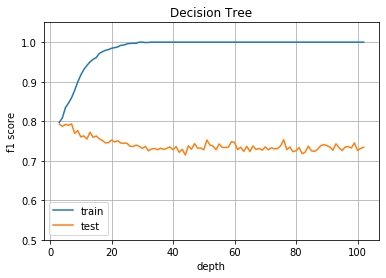

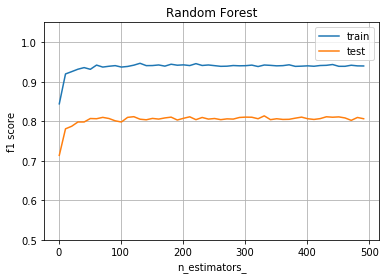

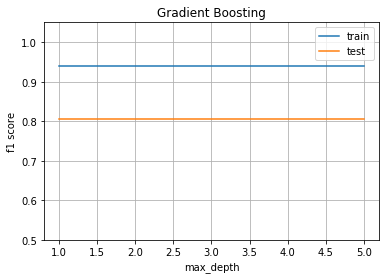

In [62]:
plot_func(n_neighbors_, f1_train_kn, f1_test_kn, 'KNeighbors','neighbors')
plot_func(depth, f1_train_dt, f1_test_dt, 'Decision Tree','depth')
plot_func(n_estimators_, f1_train_rf, f1_test_rf, 'Random Forest','n_estimators_')
plot_func(n, f1_train_gb, f1_test_gb, 'Gradient Boosting','max_depth')

Судя по графикам, лучший вариант KNeighbors - использование 3 соседей, для Decision Tree лучшая глубина - 4, Random Forest-50 деревьев, а градиентный бустинг одинаково хорошо работает для этой задачи с любой максимальной глубиной